# Bayesian Normal Mean Model

The Bayesian normal mean model combines **our prior belief** about a normal distribution's mean with **observed data**, resulting in a posterior mean that's a precision-weighted average of the prior mean and sample mean.

# Graphical Summary

![fig](./graphical_summary/Slide25.png)

# Key Formula

Under the Bayesian regression setting, we have
$$
\mathbf{Y} = \mathbf{X} \theta + \boldsymbol{\varepsilon}, \quad \boldsymbol{\varepsilon} \sim \mathcal{N}(0, \sigma^2 \mathbf{I})
$$
where we place a **prior distribution** on the regression coefficients: $\theta \sim \mathcal{N}(\theta_0, \Sigma_0)$.

- $ \mathbf{Y} \in \mathbb{R}^{N \times 1} $: phenotype vector
- $ \mathbf{X} \in \mathbb{R}^{N \times 1} $: genotype vector (e.g., 0, 1, 2 for additive coding)
- $ \theta \in \mathbb{R} $: a scalar, genetic effect size (regression coefficient)
- $ \boldsymbol{\varepsilon} \in \mathbb{R}^{N \times 1} $: residual error, assumed i.i.d. Gaussian


# Technical Details

Note that we switch from $\beta$ to $\theta$ as we now consider $\theta$ a random variable to estimate, but conceptually they are the same thing -- effect of $X$ on $Y$.



## Model Assumptions

In the Bayesian normal mean model, we assume the variable $Y$ follows uni-variate normal model $\mathcal{N}(X\theta, \sigma^2)$

$$
Y \sim \mathcal{N}(X\theta, \sigma^2)
$$


where:
- $ \theta $ is the unknown mean parameter.
- $ \sigma^2 $ is the known variance.
- $X$ is the genotype value (fixed) for each individual

Since $X$ is fixed, then the question becomes what can we learn about the unknown parameter $\theta$.

## Prior Distribution

A common choice for the prior on $ \theta $ is a normal distribution:

$$
\theta \sim \mathcal{N}(\theta_0, \sigma_0^2)
$$

where $ \theta_0 $ is the prior mean and $ \sigma_0^2 $ is the prior variance. 

The precision is defined as $\tau_0 = \frac{1}{\sigma_0^2}$. In other words, the prior of $\theta$ can be rewritten as:

$$
\theta \sim \mathcal{N}(\theta_0, \frac{1}{\tau_0})
$$

Therefore, the probability density function (PDF) is 

$$
\begin{align}
p(\theta)&\propto \exp\left(-\frac{1}{2}\tau_0\theta^2 + \tau_0\theta_0 \theta\right) \\
       &\propto \exp\left(-\frac{1}{2}\tau_0 (\theta - \theta_0)^2\right)
\end{align}
$$


(Here, the 0 subscript is used to indicate that $\theta_0$ and $\sigma_0$ are parameters in the prior.)

## Likelihood

The likelihood of the data given $\theta$ and $\sigma^2$ is:

$$
Y\mid\theta, \sigma^2 \sim \mathcal{N}(\theta, \sigma^2)
$$

The probability density function (PDF) is:

$$
\begin{align}
p(Y\mid\theta) &\propto \exp\left(-\frac{1}{2} \tau (Y^2 - 2\theta Y)\right)\\
&\propto \exp\left(-\frac{1}{2} \tau (Y - \theta)^2\right)
\end{align}
$$

where $\tau = \frac{1}{\sigma^2}$ is the precision.


## Posterior Distribution

Using Bayes' theorem, the posterior distribution of $ \theta $ is given by:

$$
p(\theta|Y) \propto p(Y|\theta) p(\theta)
$$

Expanding the probability density functions:

$$
\begin{align}
p(\theta \mid Y) &\propto \exp\left(-\frac{1}{2} \tau (Y - \theta)^2\right) \exp\left(-\frac{1}{2} \tau_0 (\theta - \theta_0)^2\right) \\
&\propto \exp\left(-\frac{1}{2} \tau (Y^2 - 2Y\theta + \theta^2) - \frac{1}{2} \tau_0 (\theta^2 - 2\theta \theta_0 + \theta_0^2)\right) \\
&\propto \exp\left(-\frac{1}{2} (\tau + \tau_0) \theta^2 + (\tau Y + \tau_0 \theta_0) \theta \right)
\end{align}
$$

Recognizing the quadratic form, the posterior distribution follows a normal distribution:

$$
\theta \mid Y \sim \mathcal{N}\left( \theta_1, \sigma_1^2 \right)
$$

where

$$
\theta_1 = \frac{\tau Y + \tau_0 \theta_0}{\tau + \tau_0}, \quad \sigma_1^2 = \frac{1}{\tau + \tau_0}
$$

## Characteristics

- **Bayes' theorem** combines these components: $P(\theta|D) \propto P(D|\theta) P(\theta)$.
- The **prior** represents our belief about the parameter before seeing any data.
- The **likelihood** represents how likely we are to observe the data given the parameter.
- The **posterior** is the updated belief about the parameter after seeing the data.
    - the **Posterior precision** ($\tau_1$) is the sum of the Data precision ($\tau$) and the Prior precision ($\tau_0$). This makes sense: the more precise your data, and the more precise your prior information, the more precise your posterior information. Also, this means that the data always improves your posterior precision compared with the prior: noisy data (small $\tau$) improves it only a little, whereas precise data improves it a lot.
    - If we rewrite the **posterior mean** as:
  
    $$
    \theta_1=w\sum_i^n x_i+(1−w)\theta_0
    $$
        
    where $w=\tau(\tau+\tau_0)$. Thus $\theta_1$ is a weighted average of the sum of the data $x_i$ and the prior mean $\theta_0$. And the weights depend on the relative precision of the data and the prior. If the data are precise compared with the prior ($\tau>>\tau_0$) then the weight $w$ will be close to 1 and the posterior mean will be close to the data.

# Example

This R example demonstrates a Bayesian normal mean model for updating beliefs about a population parameter using observed data. The analysis starts with a prior belief that the true mean ($\theta$) follows a normal distribution with mean 0.1 and variance 1. After observing height measurements from five individuals, the code applies Bayesian updating rules to compute the posterior distribution, which combines the prior information with the likelihood of the observed data. The example illustrates how the posterior mean shifts toward the sample average while the posterior variance decreases (indicating increased certainty), and visualizes both the prior and posterior distributions along with the observed data points to show how Bayesian inference updates our beliefs in light of new evidence.

- Requirement:
  - [Bayes rule](https://gaow.github.io/statgen-prerequisites/Bayes_rule.html)
  - [OLS](https://gaow.github.io/statgen-prerequisites/ordinary_least_squarehtml)

In [18]:
# Clear the environment
rm(list = ls())


## Prior Distribution

We assume a normal prior for $\theta$:

$$
\theta \sim \mathcal{N}(\theta_0, \sigma_0^2)
$$

where:

- $\theta_0 = 0.1$ (prior mean),
- $\sigma_0^2 = 1$ (prior variance), leading to a precision $\tau_0 = 1/\sigma_0^2$.

In [19]:
# Prior distribution of mu
theta_0 <- 0.1  # Prior mean
sigma_0 <- 1  # Prior standard deviation
tau_0 <- 1 / sigma_0^2  # Prior precision
print(paste("Prior mean (theta_0):", theta_0))
print(paste("Prior standard deviation (sigma_0):", sigma_0))
print(paste("Prior precision (tau_0):", tau_0))

[1] "Prior mean (theta_0): 0.1"
[1] "Prior standard deviation (sigma_0): 1"


[1] "Prior precision (tau_0): 1"


## Observed Data and the likelihood function

Let's say that we observe heights of five individuals, and we assume the likelihood follows:

$$
Y | \theta, \sigma^2, X \sim \mathcal{N}(X\theta, \sigma^2)
$$

To simplify, we assume that the individuals all have the same genotype value $X=1$ (if not, then it is just the genotype value times $\theta$).

In [20]:
# assign observed standardized height for the 5 individuals
Y <- c(0.1, 0.04, -0.07, 0.15, 0.2)
N <- length(Y)

In [21]:
# Likelihood: Assumption - Heights follow N(theta, sigma^2) with known variance
sigma <- 1  # Known standard deviation for heights within genotype class X=1
tau <- 1 / sigma^2  # Precision
print(paste("Likelihood standard deviation (sigma):", sigma))
print(paste("Likelihood precision (tau):", tau))

[1] "Likelihood standard deviation (sigma): 1"
[1] "Likelihood precision (tau): 1"


## Posterior Distribution Update

Using Bayesian updating, the posterior distribution is given by:

$$
\theta | Y \sim \mathcal{N}(\theta_1, \sigma_1^2)
$$

where:

- **Posterior precision**:
  $\tau_1 = \tau_0 + n \tau$
- **Posterior mean**:
  $\theta_1 = \frac{\tau_0 \theta_0 + \tau \sum Y}{\tau_1}$
- **Posterior standard deviation**:
  $\sigma_1 = \sqrt{\frac{1}{\tau_1}}$


In [22]:
# Posterior parameters update
tau_1 <- tau_0 + N * tau  # Posterior precision
sigma_1 <- sqrt(1 / tau_1)  # Posterior standard deviation
theta_1 <- (tau_0 * theta_0 + tau * sum(Y)) / tau_1  # Posterior mean
print(paste("Posterior mean (theta_1):", theta_1))
print(paste("Posterior standard deviation (sigma_1):", sigma_1))
print(paste("Posterior precision (tau_1):", tau_1))

[1] "Posterior mean (theta_1): 0.0866666666666667"
[1] "Posterior standard deviation (sigma_1): 0.408248290463863"
[1] "Posterior precision (tau_1): 6"


## Plot the prior and posterior distribution

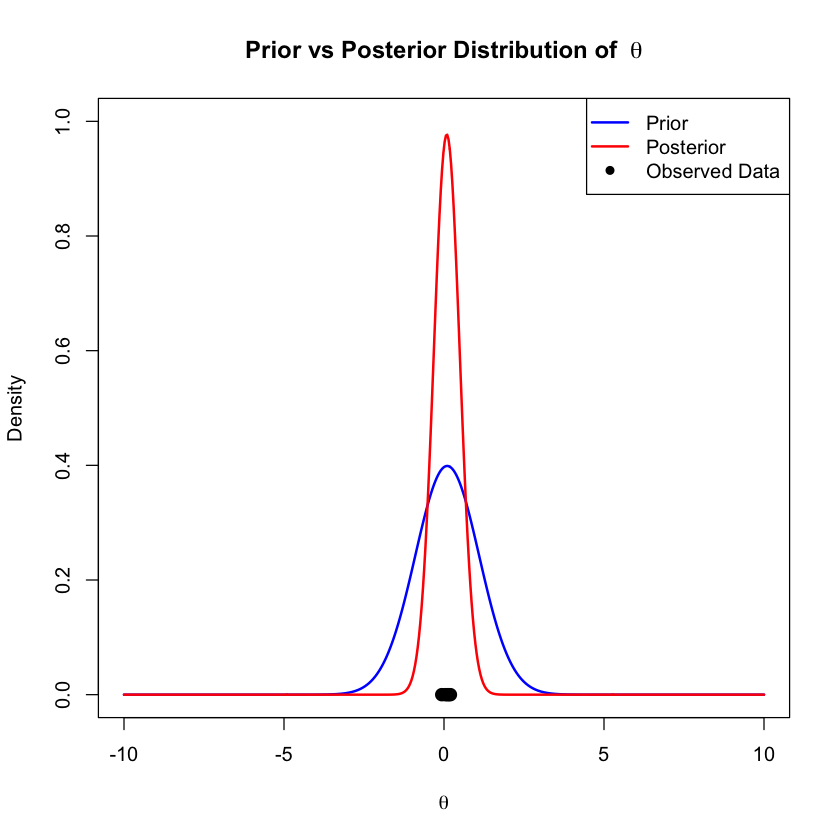

In [ ]:
# Plot the prior distribution
curve(dnorm(x, theta_0, sigma_0), from = -10, to = 10, col = "blue", lwd = 2, 
      xlab = expression(theta), ylab = "Density", main = expression(bold("Prior vs Posterior Distribution of " ~ theta)),
     ylim = c(0,1), n=500)

# Add the posterior distribution
curve(dnorm(x, theta_1, sigma_1), from = -10, to = 10, col = "red", lwd = 2, add = TRUE, n=500)

# Add three observations (data points)
points(Y, rep(0, N), col = "black", pch = 16, cex = 1.5)

# Add legend
legend("topright", legend = c("Prior", "Posterior", "Observed Data"), 
       col = c("blue", "red", "black"), 
       lty = c(1, 1, NA), lwd = c(2, 2, NA), pch = c(NA, NA, 16))


Now let's consider that if the $\theta$ is a fixed effect, then we would simply fit the ordinary least square to get an estimate of $\theta$:

[1] "=== Fixed Effect (OLS) Results ==="
[1] "Intercept estimate: -0.009"
[1] "Slope estimate: 0.031"


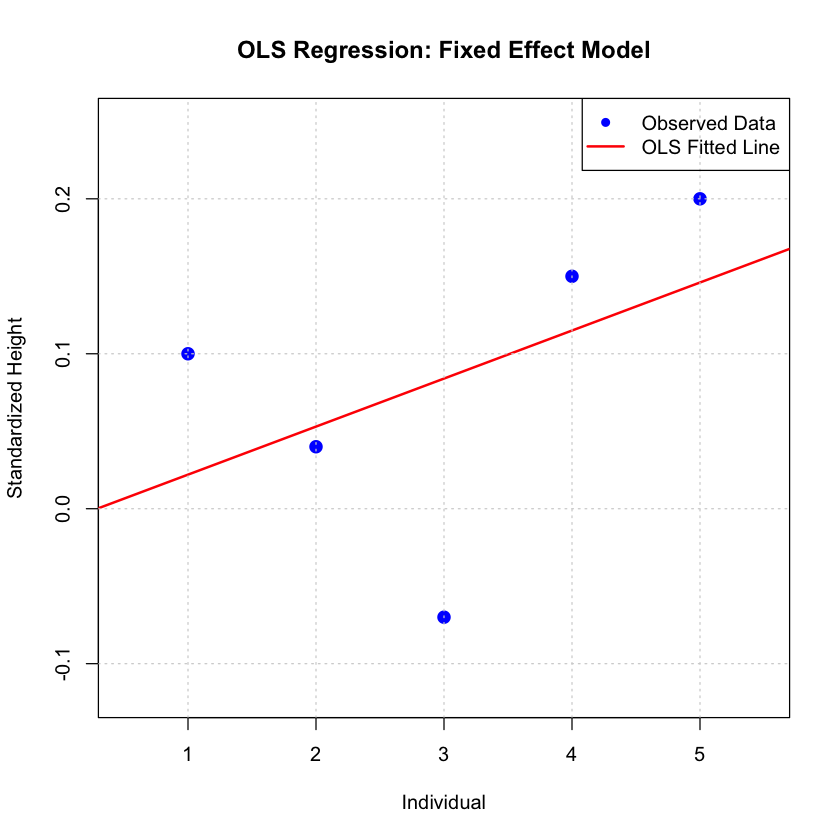

In [25]:
## Fixed Effect (Frequentist) Approach - Ordinary Least Squares

# Create X variable (individual index or could be genotype values)
X <- 1:N  # Individual indices (1, 2, 3, 4, 5)

# Fit OLS regression: Y = intercept + slope * X + error
ols_model <- lm(Y ~ X)
theta_intercept <- coef(ols_model)[1]  # Intercept estimate
theta_slope <- coef(ols_model)[2]      # Slope estimate

print("=== Fixed Effect (OLS) Results ===")
print(paste("Intercept estimate:", round(theta_intercept, 4)))
print(paste("Slope estimate:", round(theta_slope, 4)))

# Create scatterplot with fitted line
plot(X, Y, 
     pch = 16, 
     cex = 1.5, 
     col = "blue",
     xlab = "Individual", 
     ylab = "Standardized Height", 
     main = "OLS Regression: Fixed Effect Model",
     xlim = c(0.5, 5.5),
     ylim = c(min(Y) - 0.05, max(Y) + 0.05))

# Add the fitted regression line
abline(ols_model, col = "red", lwd = 2)

# Add grid for better readability
grid()

# Add legend
legend("topright", 
       legend = c("Observed Data", "OLS Fitted Line"), 
       col = c("blue", "red"), 
       pch = c(16, NA),
       lty = c(NA, 1),
       lwd = c(NA, 2))

# Supplementary

## Graphical Summary

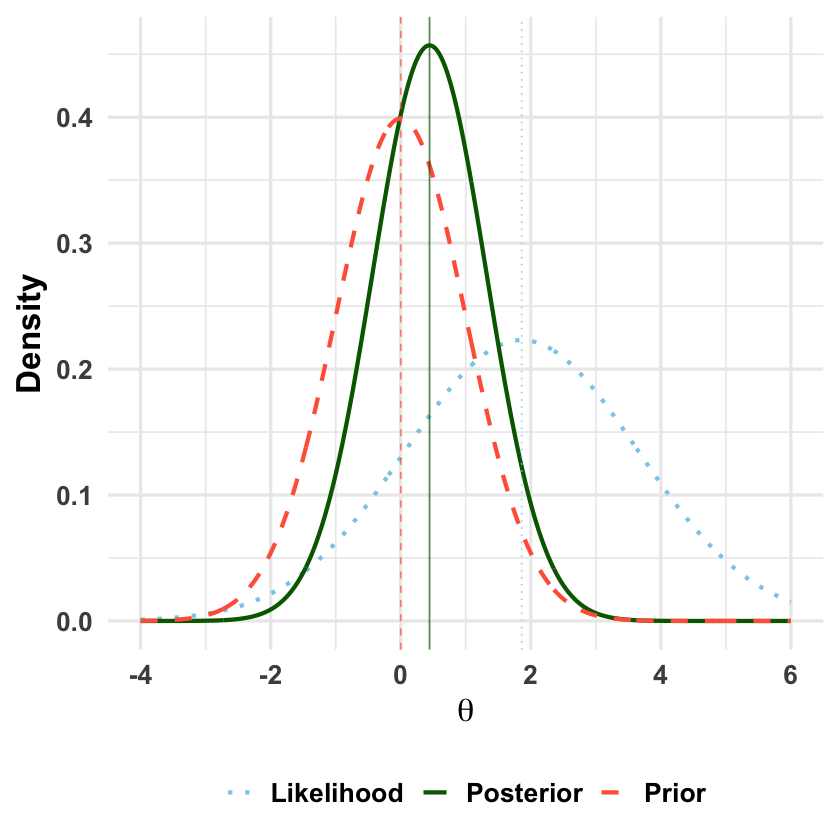

In [29]:
library(ggplot2)
library(dplyr)

# Set parameters
# Prior: N(mu_0, sigma_0^2)
mu_0 <- 0      # Prior mean
sigma_0 <- 1   # Prior standard deviation (smaller = more informative prior)

# Data (observed values)
y_obs <- c(1.2, 2.1, 1.8, 2.3, 1.9)  # Sample data
n <- length(y_obs)
y_bar <- mean(y_obs)  # Sample mean
sigma <- 4  # Known likelihood standard deviation (larger = less informative data)

# Calculate posterior parameters (conjugate normal-normal case)
# Posterior precision = prior precision + likelihood precision
tau_0 <- 1 / sigma_0^2    # Prior precision
tau_likelihood <- n / sigma^2  # Likelihood precision
tau_1 <- tau_0 + tau_likelihood  # Posterior precision

# Posterior parameters
sigma_1 <- sqrt(1 / tau_1)  # Posterior standard deviation
mu_1 <- (tau_0 * mu_0 + tau_likelihood * y_bar) / tau_1  # Posterior mean

# Create data for plotting
theta_range <- seq(-4, 6, length.out = 1000)

# Calculate densities
prior_density <- dnorm(theta_range, mu_0, sigma_0)
likelihood_density <- dnorm(theta_range, y_bar, sigma/sqrt(n))  # Likelihood as function of theta
posterior_density <- dnorm(theta_range, mu_1, sigma_1)

# Combine into data frame
plot_data <- data.frame(
  theta = rep(theta_range, 3),
  density = c(prior_density, likelihood_density, posterior_density),
  distribution = rep(c("Prior", "Likelihood", "Posterior"), each = length(theta_range))
)

# Create the plot
p <- ggplot(plot_data, aes(x = theta, y = density, color = distribution, linetype = distribution)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = c("Prior" = "tomato", 
                               "Likelihood" = "skyblue", 
                               "Posterior" = "darkgreen")) +
  scale_linetype_manual(values = c("Prior" = "dashed", 
                                  "Likelihood" = "dotted", 
                                  "Posterior" = "solid")) +
  labs(
    y = "Density",
    x = expression(theta),
    color = "Distribution",
    linetype = "Distribution"
  ) +
  theme_minimal(base_size = 20) +
  theme(
    plot.title = element_blank(),
    axis.title.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.text.x = element_text(face = "bold"),
    axis.text.y = element_text(face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(face = "bold"),
    legend.position = "bottom"
  ) +
  guides(color = guide_legend(override.aes = list(size = 1.5)))

# Add vertical lines for means
p <- p + 
  geom_vline(xintercept = mu_0, color = "tomato", linetype = "dashed", alpha = 0.7) +
  geom_vline(xintercept = y_bar, color = "skyblue", linetype = "dotted", alpha = 0.7) +
  geom_vline(xintercept = mu_1, color = "darkgreen", linetype = "solid", alpha = 0.7)

# Display plot
print(p)

# Save plot to file
ggsave("./cartoons/Bayesian_normal_mean_model.png", plot = p,
       width = 10, height = 6, 
       bg = "transparent",
       dpi = 300)